In [1]:
import numpy as np 
import networkx as nx
import cdlib as cd
from cdlib import algorithms
from cdlib import evaluation, TemporalClustering
from networkx.generators.community import LFR_benchmark_graph
import matplotlib as mpl
import dynetx as dn

Note: to be able to use all crisp methods, you need to install some additional packages:  {'karateclub', 'wurlitzer', 'graph_tool'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'karateclub', 'ASLPAw'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer'}


In [2]:
graph_dic = np.load('..\data_collection\graph\list_pos_graph.npy',allow_pickle='TRUE').item()

In [ ]:
#create list of communities
coms_list_lp = []
coms_list_GN = []
coms_list_eig = []
coms_list_lei = []

for i in graph_dic.keys():
    j = int(i) 
    if j > 1999:
        coms_list_lp.append(algorithms.label_propagation(graph_dic[i]))
        coms_list_GN.append(algorithms.girvan_newman(graph_dic[i], level = 3))
        coms_list_eig.append(algorithms.eigenvector(graph_dic[i]))
        coms_list_lei.append(algorithms.leiden(graph_dic[i])) 

[0.05104166666666666, 0.11645833333333333, 0.06837606837606837, 0.17939814814814817]


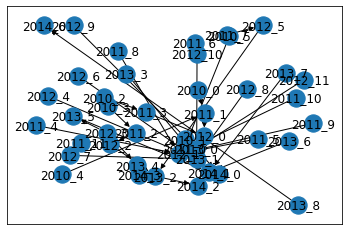

In [ ]:
#analysis with Leiden alg.
tc_lei = TemporalClustering()

for t in range(2010, 2015):
    tc_lei.add_clustering(coms_list_lei[t-2000], t)

trend_lei = tc_lei.clustering_stability_trend(evaluation.nf1)
print(trend_lei)

jaccard = lambda x, y:  len(set(x) & set(y)) / len(set(x) | set(y)) #def jaccard index, once for all

matches_lei = tc_lei.community_matching(jaccard, two_sided = True)
polyt_lei = tc_lei.lifecycle_polytree(jaccard, two_sided = False)

for nodes in nx.weakly_connected_components(polyt_lei):
    sub = polyt_lei.subgraph(nodes)
    nx.draw_networkx(sub, pos = nx.spring_layout(sub), arrows = True, with_labels = True)

In [ ]:
#delete from the polytree very small comms and then run the same "block"
bucket = set()
for node in polyt_lei:
    if len(set(tc_lei.get_community(node))) < 5:
        bucket.add(node)

for node in bucket:
    polyt_lei.remove_node(node)

In [ ]:
for node in polyt_lei:
    print("we are dealing with the community at time:" ), print(node)
    if len(set(polyt_lei.predecessors(node))) > 0:
        print("the community is (possibly) a merge of ")
        for a in polyt_lei.predecessors(node):
            print(a)

    sum =  0 
    for n_p_n in polyt_lei.predecessors(node): #n_p_n = "node predecessor of node"
        sum = sum + len(tc_lei.get_community(n_p_n))
    if sum > 0:
        print("the community is made of " + str(len(tc_lei.get_community(node))) + "nodes, while before it was made of" + str(sum) + "nodes")

    if len(set(polyt_lei.successors(node))) > 0:
        print("the community (possibly) splits in")
        for a in polyt_lei.successors(node):
            print(a)
    print("\n")

we are dealing with the community at time:
2010_0
the community (possibly) splits in
2011_1


we are dealing with the community at time:
2011_1
the community is (possibly) a merge of 
2010_0
the community is made of 170nodes, while before it was made of172nodes
the community (possibly) splits in
2012_0


we are dealing with the community at time:
2010_1
the community (possibly) splits in
2011_0


we are dealing with the community at time:
2011_0
the community is (possibly) a merge of 
2010_1
the community is made of 171nodes, while before it was made of147nodes
the community (possibly) splits in
2012_1


we are dealing with the community at time:
2010_2
the community (possibly) splits in
2011_3


we are dealing with the community at time:
2011_3
the community is (possibly) a merge of 
2010_2
the community is made of 23nodes, while before it was made of89nodes
the community (possibly) splits in
2012_0


we are dealing with the community at time:
2010_3
the community (possibly) splits in

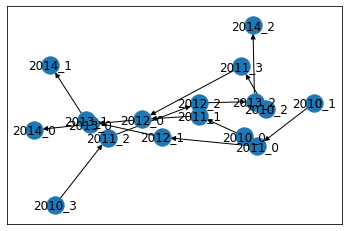

In [ ]:
for nodes in nx.weakly_connected_components(polyt_lei):
    sub = polyt_lei.subgraph(nodes)
    nx.draw_networkx(sub, pos = nx.spring_layout(sub), arrows = True, with_labels = True)

In [ ]:
tc_lp = TemporalClustering()
tc_eig = TemporalClustering()
tc_GN = TemporalClustering()
for t in range(2010, 2015):         #create temporal clustering
    tc_lp.add_clustering(coms_list_lp[t -2000], t)
    tc_eig.add_clustering(coms_list_eig[t -2000], t)
    tc_GN.add_clustering(coms_list_GN[t-2000], t)

trend_lp = tc_lp.clustering_stability_trend(evaluation.nf1)
print(trend_lp)
trend_eig = tc_eig.clustering_stability_trend(evaluation.nf1)
print(trend_eig)
trend_GN = tc_GN.clustering_stability_trend(evaluation.nf1)
print(trend_GN)

matches_lp = tc_lp.community_matching(jaccard, two_sided=True)
matches_eig = tc_eig.community_matching(jaccard, two_sided=True)
matches_GN = tc_GN.community_matching(jaccard, two_sided=True)

polyt_lp = tc_lp.lifecycle_polytree(jaccard, two_sided = False)     #create polytree that represent the evolution of communities
polyt_eig = tc_eig.lifecycle_polytree(jaccard, two_sided = False)
polyt_GN = tc_GN.lifecycle_polytree(jaccard, two_sided = False)

[0.9822616407982262, 0.986870897155361, 0.9785867237687366, 0.9852320675105485]
[0.19999999999999998, 0.05857142857142857, 0.0553316326530612, 0.06207589285714285]
[0.053066666666666665, 0.0934375, 0.04671875, 0.03679012345679012]


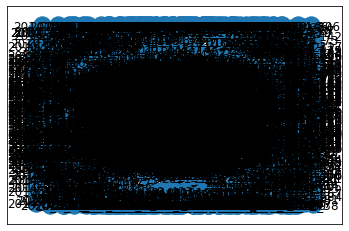

In [ ]:
for nodes in nx.weakly_connected_components(polyt_lp):
    sub = polyt_lp.subgraph(nodes)
    nx.draw_networkx(sub, pos=nx.spring_layout(sub), arrows = True, with_labels= True)
#ex-post: useless for LP

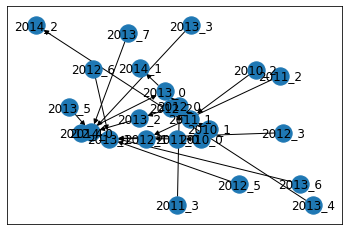

In [ ]:
for nodes in nx.weakly_connected_components(polyt_eig):    
    sub =  polyt_eig.subgraph(nodes)
    nx.draw_networkx(sub, pos=nx.spring_layout(sub), arrows = True, with_labels= True)

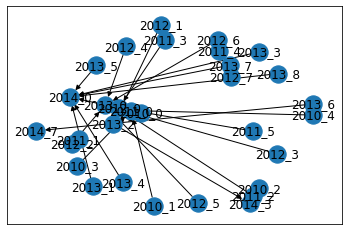

In [ ]:
for nodes in nx.weakly_connected_components(polyt_GN):
    sub =  polyt_GN.subgraph(nodes)
    nx.draw_networkx(sub, pos=nx.spring_layout(sub), arrows = True, with_labels= True)

In [ ]:
#Eig fist, the GN
#delete from the polytree very small comms and then run the same "algorithm"
bucket = set()
for node in polyt_eig:
    if len(set(tc_eig.get_community(node))) < 5:
        bucket.add(node)

for node in bucket:
    polyt_eig.remove_node(node)




bucket = set()
for node in polyt_GN:
    if len(set(tc_GN.get_community(node))) < 5:
        bucket.add(node)

for node in bucket:
    polyt_GN.remove_node(node)

In [ ]:
#Eig fist, the GN
for node in polyt_eig:
    print("we are dealing with the community at time:" ), print(node)
    if len(set(polyt_eig.predecessors(node))) > 0:
        print("the community is (possibly) a merge of ")
        for a in polyt_eig.predecessors(node):
            print(a)

    sum =  0 #instr variable to compute if the community has enlarged or otherwise
    for n_p_n in polyt_eig.predecessors(node): #n_p_n stands for "node predecessor of node"
        sum = sum + len(tc_eig.get_community(n_p_n))
    if sum > 0:
        print("the community is made of " + str(len(tc_eig.get_community(node))) + "nodes, while before it was made of" + str(sum) + "nodes")

    if len(set(polyt_eig.successors(node))) > 0:
        print("the community (possibly) splits in")
        for a in polyt_eig.successors(node):
            print(a)
            
    print("\n")

print("end of Eig, start of GN \n")

for node in polyt_GN:
    print("we are dealing with the community at time:" ), print(node)
    if len(set(polyt_GN.predecessors(node))) > 0:
        print("the community is (possibly) a merge of ")
        for a in polyt_GN.predecessors(node):
            print(a)

    sum =  0 #instr variable to compute if the community has enlarged or otherwise
    for n_p_n in polyt_GN.predecessors(node): #n_p_n stands for "node predecessor of node"
        sum = sum + len(tc_GN.get_community(n_p_n))
    if sum > 0:
        print("the community is made of " + str(len(tc_GN.get_community(node))) + "nodes, while before it was made of" + str(sum) + "nodes")

    if len(set(polyt_GN.successors(node))) > 0:
        print("the community (possibly) splits in")
        for a in polyt_GN.successors(node):
            print(a)
    print("\n")



we are dealing with the community at time:
2010_0
the community (possibly) splits in
2011_0


we are dealing with the community at time:
2011_0
the community is (possibly) a merge of 
2010_0
the community is made of 234nodes, while before it was made of226nodes
the community (possibly) splits in
2012_1


we are dealing with the community at time:
2010_1
the community (possibly) splits in
2011_1


we are dealing with the community at time:
2011_1
the community is (possibly) a merge of 
2010_1
the community is made of 215nodes, while before it was made of216nodes
the community (possibly) splits in
2012_0


we are dealing with the community at time:
2012_1
the community is (possibly) a merge of 
2011_0
the community is made of 150nodes, while before it was made of234nodes
the community (possibly) splits in
2013_1


we are dealing with the community at time:
2012_0
the community is (possibly) a merge of 
2011_1
the community is made of 203nodes, while before it was made of215nodes
the comm

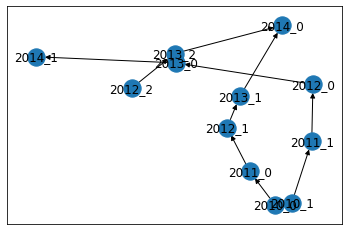

In [ ]:
#Before eig, then GN. Polytree without small (<5) comms
for nodes in nx.weakly_connected_components(polyt_eig):
    sub = polyt_eig.subgraph(nodes)
    nx.draw_networkx(sub, pos = nx.spring_layout(sub), arrows = True, with_labels = True)

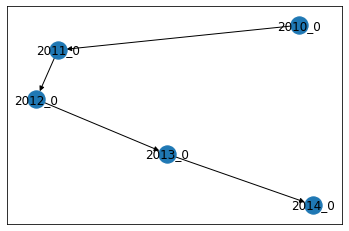

In [ ]:
for nodes in nx.weakly_connected_components(polyt_GN):
    sub = polyt_GN.subgraph(nodes)
    nx.draw_networkx(sub, pos = nx.spring_layout(sub), arrows = True, with_labels = True)

In [ ]:
dg = dn.DynGraph()
for i in range(2010, 2015):
    year = str(i)
    g = graph_dic[year]
    dg.add_interactions_from(list(g.edges()), t=i)

In [ ]:
tc_eig = algorithms.tiles(dg, obs=1)
tc_GN = algorithms.tiles(dg, obs=1)

In [ ]:
trend_eig = tc_eig.clustering_stability_trend(evaluation.nf1)
print(trend_eig)
trend_GN = tc_GN.clustering_stability_trend(evaluation.nf1)
print(trend_GN)

[0.0002938583602703497, 0.0005189413596263622, 0.0006648936170212766, 0.0015625, 0.0955]
[0.0002938583602703497, 0.0005189413596263622, 0.0006648936170212766, 0.0015625, 0.0955]


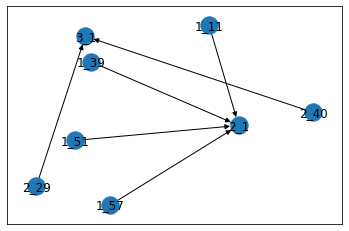

In [ ]:
#create polytree that represent the evolution of communities
polyt_eig = tc_eig.lifecycle_polytree()
polyt_GN = tc_GN.lifecycle_polytree()

for nodes in nx.weakly_connected_components(polyt_eig):    
    sub =  polyt_eig.subgraph(nodes)
    nx.draw_networkx(sub, pos=nx.spring_layout(sub), arrows = True, with_labels= True)

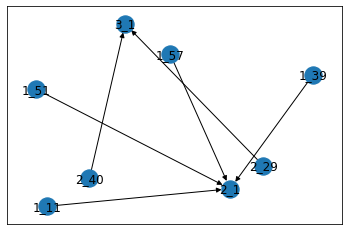

In [ ]:
for nodes in nx.weakly_connected_components(polyt_GN):
    sub =  polyt_GN.subgraph(nodes)
    nx.draw_networkx(sub, pos=nx.spring_layout(sub), arrows = True, with_labels= True)